<a href="https://colab.research.google.com/github/ramon-santana-silva/miniprojeto01/blob/main/roofimoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Mini Projeto Roof Imóveis </h1>

<h1>CONTEXTO</h1>
Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, uma consultoria estratégica permitirá investir em imóveis no Condado de County, nos Estados
Unidos.
<h1>OBJETIVO</h1>
Construir um modelo que permite a "Roof Imóveis" identificar os 5 imóveis melhores para investir e quais o 5 imóveis que não deveria investir de forma alguma.

In [1]:
#bibliotecas de manipulação de dados 
!pip install pandas 
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sidetable
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importação das bibliotecas
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sidetable as stb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error

O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

<h2>Extração/ Obtenção de dados</h2>
As bases de dados foram retiradas do site: https://www.kaggle.com/harlfoxem/housesalesprediction e https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/ e dataset extraidos do repositorio Github :'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv' e 'https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'

In [3]:
#extraindo dataframe
DATA_URL ='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/kc_house_data.csv'     
#convertendo objeto para data parse_dates
roof_df= pd.read_csv(DATA_URL,sep=',',parse_dates=["date"])


<h1>Informação das colunas do dataframe roof_df</h1>
                             

*   id - Identiﬁcador único do imóvel 
*   view - Grau de quão belo é a vista do imóvel (0 a 4)
*   date - Data da Venda
*   condition - Condição da casa (1 a 5)
*   price - Preço de venda
*   grade - Classiﬁcação por qualidade de material utilizado na
construção
*   bedrooms - Nº de Quartos
*   bathrooms - Nº de Banheiros 
*   sqft_above - Área em acima do solo em ft²
*   sqft_liv - Tamanho de área habitável em ft²sqft_basmtÁrea em abaixo do solo em ft²
*   sqft_lot - Tamanho do terreno em ft²
*   yr_built - Ano de construção
*   ﬂoors - Número de andares
*   yr_renov - Ano de restauração, caso o contrário, 0.
*   zipcode - Zip Code 5 - Similar ao CEP
*   waterfront - Indicativo se o imóvel é a beira-mar
*   lat - Latitude
*   long - Longitude
*   squft_liv15 - Média da área habitável dos 15 imóveis mais próximos,
em ft²
*   squft_lot15 - Média da área do lote dos 15 imóveis mais próximos,
em ft²













In [4]:
#extraindo dataframe zipcode_df
DATA_URL2='https://raw.githubusercontent.com/ramon-santana-silva/pythonCaseDNC/main/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv'
zipcode_df=pd.read_csv(DATA_URL2 , sep=",", encoding='UTF-8')



<h1>Informação das colunas do dataframe zipcode_df</h1>

*  OBJECTID -	Código ID
*  zipcode - Zip Code 5 - Similar ao CEP
*  COUNTY - Código do municipio
*  COUNTY	County code
*  ZIP_TYPE -	tipo de zipcode: padrão ou caixa postal
*  Shape_Leng -	comprimento poligonal
*  Shape_Area -	aréa poligonal








<h2>Limpeza dos Dataframes roof_df e zipcode_df </h2>
Para uma analise mais clara e objetiva serão excluidas algumas colunas que não são necessarias nesse modelo de previsão de dados


*   Tipo de colunas como:
1.   Dados repedidos ou similares
2.   Ids desnecessarios
3.   Tipo de zipcode

*   Filtrar por informações  alvo do projeto








In [5]:
#zipcode_df sendo reduzido atraves da criação de novo dataframe somente com o municipio de King County alvo do projeto
zipKingCounty_df= zipcode_df[(zipcode_df.COUNTY == 33)]
zipKingCounty_df

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,148134.771476,5.261214e+08
1,2,98002,98002,33,Standard,King County,AUBURN,105168.476823,2.044452e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,121645.069928,3.169812e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,108801.063326,2.014512e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116930.354131,2.112733e+08
...,...,...,...,...,...,...,...,...,...
100,101,98199,98199,33,Standard,King County,SEATTLE,56408.722420,1.132192e+08
108,109,98224,98224,33,PO Box,King County,BARING,187335.039773,1.720745e+09
118,119,98288,98288,33,PO Box,King County,SKYKOMISH,484891.351634,8.749464e+09
147,148,98354,98354,33,Standard,King County,MILTON,25310.379574,1.500487e+07


In [6]:
#identificando valores únicos do dataframe zipKingCounty_df
zipKingCounty_df.nunique()

OBJECTID          87
ZIP               87
ZIPCODE           87
COUNTY             1
ZIP_TYPE           2
COUNTY_NAME        1
PREFERRED_CITY    33
Shape_Length      87
Shape_Area        87
dtype: int64

In [7]:
# Verificando o cabeçalho
roof_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Verificando informações do dataset
roof_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        209 non-null    int64  
 1   ZIP             209 non-null    int64  
 2   ZIPCODE         209 non-null    int64  
 3   COUNTY          209 non-null    int64  
 4   ZIP_TYPE        209 non-null    object 
 5   COUNTY_NAME     209 non-null    object 
 6   PREFERRED_CITY  209 non-null    object 
 7   Shape_Length    209 non-null    float64
 8   Shape_Area      209 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 14.8+ KB


In [10]:
# Verificando quantos dados nulos há
roof_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#verificando quantos dados nulos há
zipcode_df.isnull().sum()

OBJECTID          0
ZIP               0
ZIPCODE           0
COUNTY            0
ZIP_TYPE          0
COUNTY_NAME       0
PREFERRED_CITY    0
Shape_Length      0
Shape_Area        0
dtype: int64

In [12]:
#unindo os datasets roof_df e zipcode_df
df=pd.merge(roof_df, zipcode_df, left_on='zipcode', right_on='ZIPCODE', how='left').drop('ZIPCODE',axis=1).drop('COUNTY',axis=1).drop('ZIP_TYPE',axis=1).drop('COUNTY_NAME',axis=1)  
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,97,98178,SEATTLE,67151.963868,1.353411e+08
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,81,98125,SEATTLE,66923.859716,1.496818e+08
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,24,98028,KENMORE,75146.222022,1.732332e+08
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,85,98136,SEATTLE,52855.048472,6.318620e+07
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,56,98074,SAMMAMISH,115554.667658,3.277498e+08


In [13]:
#identificando valores únicos do dataframe df
df['id'].nunique()

21436

In [14]:
df.shape

(23309, 26)

In [16]:
id_counts=df['id'].value_counts()
id_counts=id_counts.head(20)

<h1> Gráfico de Barra id dos imóveis vs quantidade de vezes vendida</h1>


---


O imóvel de id 7701960990 da cidade WOODINVILLE que está no gráfico tem as seguintes caracteristicas vantajosas:<br>
*   liquidez de venda do dia 16-06-2014 a 19-08-2014 (aproximadamente de 2 meses) com uma retabilidade de 0.92%
*   Grade: 11

O imóvel de id 3303000130 da cidade SEATTLE que está no gráfico tem as seguintes caracteristicas vantajosas:<br>
*   liquidez de venda do dia 16-01-2015 a 28-04-2015(aproximadamente 3.5 meses)	 com uma retabilidade de 40.54% e valor abaixo do valor da media da cidade.
*   grade:8, considerado acima da media 

O imóvel de id 526059224 da cidade BOTHELL que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
*   liquidez de venda do dia 23-09-2014 a 06-02-2015(aproximadamente 4.5 meses)	 com uma retabilidade de 80,77%
*   quantidade de quartos:4

O imóvel de id 1630700361 da cidade WOODINVILLE  que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
*   liquidez de venda do dia 27-06-2014 a 09-04-2015(aproximadamente 10 meses)	 com uma retabilidade de 10,09%
*   quantidade de quartos:4

O imóvel de id 9238500040 da cidade WOODINVILLE  que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
*   liquidez de venda do dia 24-06-2014 a 	10-02-2015(aproximadamente 8 meses)	 com uma retabilidade de 49,75%
*   quantidade de quartos:3

O imóvel de id 795000620 da cidade SEATTLE	  que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
*   liquidez de venda do dia 15-12-2014 a 	11-03-2015(aproximadamente 4 meses)	 com uma retabilidade de 26,61%
*   quantidade de quartos:3


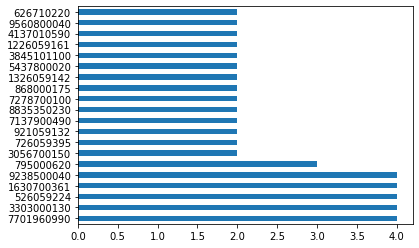

In [17]:
id_counts.plot.barh();

<h2>No gráfico acima 

In [18]:
df[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
19022,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,94,98168,SEATTLE,105513.044308,2.589595e+08
19023,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,94,98168,SEATTLE,105513.044308,2.589595e+08
19024,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,94,98168,SEATTLE,105513.044308,2.589595e+08


In [ ]:
df[df['id']==7701960990]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
12298,7701960990,2014-06-16,862000.0,4,2.5,3190,14565,2.0,0,0,...,98077,47.713,-122.072,3420,20475,58,98077,WOODINVILLE,117061.095408,4.197400e+08
12299,7701960990,2014-06-16,862000.0,4,2.5,3190,14565,2.0,0,0,...,98077,47.713,-122.072,3420,20475,59,98077,WOODINVILLE,50110.124003,7.592607e+07
12300,7701960990,2014-08-19,870000.0,4,2.5,3190,14565,2.0,0,0,...,98077,47.713,-122.072,3420,20475,58,98077,WOODINVILLE,117061.095408,4.197400e+08
12301,7701960990,2014-08-19,870000.0,4,2.5,3190,14565,2.0,0,0,...,98077,47.713,-122.072,3420,20475,59,98077,WOODINVILLE,50110.124003,7.592607e+07


In [20]:
df[df['id']==3303000130]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
5660,3303000130,2015-01-16,370000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,95,98177,SEATTLE,95410.398542,1.595630e+08
5661,3303000130,2015-01-16,370000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,96,98177,SEATTLE,5897.646683,1.716365e+06
5662,3303000130,2015-04-28,520000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,95,98177,SEATTLE,95410.398542,1.595630e+08
5663,3303000130,2015-04-28,520000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,96,98177,SEATTLE,5897.646683,1.716365e+06


In [ ]:
df[df['id']==526059224]

In [ ]:
df[df['id']==1630700361]

In [ ]:
df[df['id']==9238500040]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
13876,9238500040,2014-06-24,400000.0,3,2.5,2970,23100,1.0,0,0,...,98072,47.7735,-122.133,2390,20300,54,98072,WOODINVILLE,118806.069869,3.687420e+08
13877,9238500040,2014-06-24,400000.0,3,2.5,2970,23100,1.0,0,0,...,98072,47.7735,-122.133,2390,20300,55,98072,WOODINVILLE,78248.234396,1.513442e+08
13878,9238500040,2015-02-10,599000.0,3,2.5,2970,23100,1.0,0,0,...,98072,47.7735,-122.133,2390,20300,54,98072,WOODINVILLE,118806.069869,3.687420e+08
13879,9238500040,2015-02-10,599000.0,3,2.5,2970,23100,1.0,0,0,...,98072,47.7735,-122.133,2390,20300,55,98072,WOODINVILLE,78248.234396,1.513442e+08


In [ ]:
id_counts=df['id'].value_counts()
id_counts=id_counts.tail(20)

In [ ]:
id_counts

822039111     1
2223059052    1
2551500220    1
1049000740    1
1860600535    1
2310030490    1
9202650100    1
5101400934    1
253600150     1
8856004328    1
7228501745    1
3876000910    1
9558200210    1
3629960590    1
993000873     1
2484700015    1
1545803980    1
7853220690    1
9324800180    1
1523300157    1
Name: id, dtype: int64

<h1> Gráfico de Barra id dos imóveis vs quantidade frequência de interesse</h1>


---


O imóvel de id 1523300157 da cidade SEATTLE que está no gráfico tem as seguintes caracteristicas que mostra desvantagens:<br>
*   liquidez de venda do dia 15-10-2014
*   Grade: 7

O imóvel de id 9324800180 da cidade SEATTLE que está no gráfico tem as seguintes caracteristicas:<br>
*   quantidade de quartos:2

O imóvel de id 7853220690 da cidade SNOQUALMIE	 que está no gráfico tem as seguintes caracteristicas:<br> 



O imóvel de id 1545803980 da cidade MAPLE VALLEY  que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
*  qunatidade de banheiro é 1 sendo abaixo da media

O imóvel de id 2484700015  da cidade SEATTLE que está no gráfico tem as seguintes caracteristicas vantajosas:<br> 
*   quantidade de banheiro é 1.5 abaixo da media 


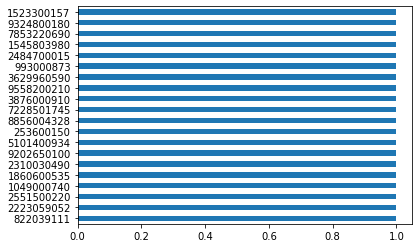

In [ ]:
id_counts.plot.barh();

In [ ]:
df[df['id']==1523300157] 

In [ ]:
df[df['id']==9324800180]

In [ ]:
df[df['id']==7853220690]

In [ ]:
df[df['id']==1545803980]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
8133,1545803980,2015-04-25,239000.0,3,1.0,1200,7810,1.0,0,0,...,98038,47.3631,-122.05,1590,7800,33,98038,MAPLE VALLEY,315896.766091,1.649766e+09


In [ ]:
df[df['id']==2484700015]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
8134,2484700015,2015-03-27,579000.0,4,1.5,2480,6000,1.0,0,0,...,98136,47.5233,-122.386,1810,6000,85,98136,SEATTLE,52855.048472,6.318620e+07


In [21]:
df[df['PREFERRED_CITY']=='SEATTLE'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,9.232000e+03,9.232000e+03,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,...,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9232.000000,9.232000e+03
mean,4.584788e+09,5.388645e+05,3.175693,1.899561,1809.837847,6604.978878,1.456131,0.008016,0.317049,3.439991,...,125.619476,98134.830914,47.616988,-122.333470,1696.784554,6333.255091,81.346187,98134.830914,71194.463087,1.354713e+08
std,2.845929e+09,3.439932e+05,1.035447,0.789605,811.310161,5689.025612,0.586355,0.089175,0.879292,0.701049,...,484.775680,28.671485,0.097285,0.041027,510.478926,4740.704226,10.543510,28.671485,21310.603612,5.624685e+07
min,1.200019e+06,7.800000e+04,0.000000,0.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,98102.000000,47.342900,-122.416000,460.000000,651.000000,64.000000,98102.000000,5897.646683,1.716365e+06
25%,2.126049e+09,3.400000e+05,3.000000,1.000000,1250.000000,4000.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,98115.000000,47.540500,-122.368000,1350.000000,4005.000000,74.000000,98115.000000,55894.191555,9.249711e+07
50%,4.019300e+09,4.560750e+05,3.000000,1.750000,1650.000000,5720.500000,1.000000,0.000000,0.000000,3.000000,...,0.000000,98125.000000,47.638200,-122.336000,1590.000000,5700.000000,81.000000,98125.000000,72017.644679,1.439973e+08
75%,7.234601e+09,6.350000e+05,4.000000,2.500000,2200.000000,7980.000000,2.000000,0.000000,0.000000,4.000000,...,0.000000,98155.000000,47.691600,-122.299000,1930.000000,7830.000000,90.000000,98155.000000,84971.313801,1.813174e+08
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,137214.000000,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-122.220000,4950.000000,128066.000000,101.000000,98199.000000,120954.750650,2.589595e+08


In [19]:
df[df['PREFERRED_CITY']=='SNOQUALMIE'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,3.100000e+02,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000,310.0,310.000000,310.000000,...,310.000000,310.0,310.000000,310.000000,310.000000,310.000000,310.0,310.0,3.100000e+02,3.100000e+02
mean,7.393758e+09,5.279612e+05,3.522581,2.545161,2571.322581,17065.183871,1.879032,0.0,0.290323,3.045161,...,38.409677,98065.0,47.531730,-121.861929,2518.274194,11241.748387,50.0,98065.0,3.457175e+05,2.404509e+09
std,1.412830e+09,1.856245e+05,0.853968,0.676687,924.219530,65420.399425,0.310098,0.0,0.843538,0.286524,...,273.853639,0.0,0.009233,0.028177,768.796819,31210.379480,0.0,0.0,5.830177e-11,4.776081e-07
min,1.230790e+08,1.700000e+05,0.000000,0.000000,480.000000,2513.000000,1.000000,0.0,0.000000,1.000000,...,0.000000,98065.0,47.512400,-121.890000,890.000000,2335.000000,50.0,98065.0,3.457175e+05,2.404509e+09
25%,7.852020e+09,4.249625e+05,3.000000,2.500000,1950.000000,4906.500000,2.000000,0.0,0.000000,3.000000,...,0.000000,98065.0,47.524425,-121.878000,1970.000000,5000.000000,50.0,98065.0,3.457175e+05,2.404509e+09
50%,7.852181e+09,5.000000e+05,4.000000,2.500000,2445.000000,6192.500000,2.000000,0.0,0.000000,3.000000,...,0.000000,98065.0,47.533600,-121.870000,2440.000000,5900.000000,50.0,98065.0,3.457175e+05,2.404509e+09
75%,7.853302e+09,6.183000e+05,4.000000,2.750000,3107.500000,8492.000000,2.000000,0.0,0.000000,3.000000,...,0.000000,98065.0,47.538475,-121.855250,2950.000000,7530.250000,50.0,98065.0,3.457175e+05,2.404509e+09
max,9.474700e+09,1.998000e+06,6.000000,5.500000,7350.000000,920423.000000,2.000000,0.0,4.000000,5.000000,...,2000.000000,98065.0,47.572900,-121.676000,5380.000000,411962.000000,50.0,98065.0,3.457175e+05,2.404509e+09


In [ ]:
df[df['PREFERRED_CITY']=='MAPLE VALLEY'].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,Shape_Length,Shape_Area
count,5.900000e+02,5.900000e+02,590.000000,590.000000,590.000000,590.000000,590.000000,590.0,590.000000,590.000000,...,590.000000,590.0,590.000000,590.000000,590.000000,590.000000,590.0,590.0,5.900000e+02,5.900000e+02
mean,4.125927e+09,3.668676e+05,3.435593,2.375847,2147.715254,25385.654237,1.740678,0.0,0.027119,3.193220,...,37.242373,98038.0,47.370604,-122.031790,2118.422034,20054.767797,33.0,98038.0,3.158968e+05,1.649766e+09
std,2.832811e+09,1.326628e+05,0.690774,0.452016,691.015279,63111.112446,0.433769,0.0,0.284178,0.455066,...,270.430112,0.0,0.021801,0.020412,560.510918,40271.213329,0.0,0.0,5.825705e-11,0.000000e+00
min,1.220691e+08,1.100000e+05,0.000000,1.000000,670.000000,2132.000000,1.000000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.343800,-122.079000,1000.000000,2550.000000,33.0,98038.0,3.158968e+05,1.649766e+09
25%,1.579965e+09,2.852500e+05,3.000000,2.250000,1641.500000,5000.000000,1.500000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.354525,-122.045000,1662.500000,5079.000000,33.0,98038.0,3.158968e+05,1.649766e+09
50%,3.303951e+09,3.420000e+05,3.000000,2.500000,2000.000000,6904.500000,2.000000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.364050,-122.033000,2020.000000,6719.000000,33.0,98038.0,3.158968e+05,1.649766e+09
75%,5.416511e+09,4.100000e+05,4.000000,2.500000,2570.000000,9748.250000,2.000000,0.0,0.000000,3.000000,...,0.000000,98038.0,47.381625,-122.022000,2467.500000,8550.750000,33.0,98038.0,3.158968e+05,1.649766e+09
max,9.542841e+09,1.350000e+06,5.000000,5.000000,5230.000000,623779.000000,2.500000,0.0,4.000000,5.000000,...,2015.000000,98038.0,47.458300,-121.936000,4110.000000,229996.000000,33.0,98038.0,3.158968e+05,1.649766e+09


In [ ]:
id_counts.value_counts()

1    19574
2     1856
4        5
3        1
Name: id, dtype: int64

In [ ]:
dupe_mask=id_counts==4
dupe_mask[0:5]

7701960990    True
3303000130    True
526059224     True
1630700361    True
9238500040    True
Name: id, dtype: bool

In [ ]:
id_counts.index[0:5]

Int64Index([7701960990, 3303000130, 526059224, 1630700361, 9238500040], dtype='int64')

In [ ]:
dupe_ids=id_counts.index[dupe_mask]

In [ ]:
dupe_ids=list(dupe_ids)
len(dupe_ids)

5

In [ ]:
dupe_ids

[7701960990, 3303000130, 526059224, 1630700361, 9238500040]

In [ ]:
df.loc[df['id'].isin(dupe_ids[0:5]),:].head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,OBJECTID,ZIP,PREFERRED_CITY,Shape_Length,Shape_Area
5660,3303000130,2015-01-16,370000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,95,98177,SEATTLE,95410.398542,1.595630e+08
5661,3303000130,2015-01-16,370000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,96,98177,SEATTLE,5897.646683,1.716365e+06
5662,3303000130,2015-04-28,520000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,95,98177,SEATTLE,95410.398542,1.595630e+08
5663,3303000130,2015-04-28,520000.0,3,2.25,1770,7667,1.0,0,0,...,98177,47.7724,-122.362,2180,8103,96,98177,SEATTLE,5897.646683,1.716365e+06
7757,526059224,2014-09-23,260000.0,4,1.75,1650,7276,1.0,0,0,...,98011,47.7721,-122.206,1840,8550,10,98011,BOTHELL,73480.179423,1.978500e+08
7758,526059224,2014-09-23,260000.0,4,1.75,1650,7276,1.0,0,0,...,98011,47.7721,-122.206,1840,8550,11,98011,BOTHELL,2710.689228,1.502838e+05
7759,526059224,2015-02-06,470000.0,4,1.75,1650,7276,1.0,0,0,...,98011,47.7721,-122.206,1840,8550,10,98011,BOTHELL,73480.179423,1.978500e+08
7760,526059224,2015-02-06,470000.0,4,1.75,1650,7276,1.0,0,0,...,98011,47.7721,-122.206,1840,8550,11,98011,BOTHELL,2710.689228,1.502838e+05
12298,7701960990,2014-06-16,862000.0,4,2.50,3190,14565,2.0,0,0,...,98077,47.7130,-122.072,3420,20475,58,98077,WOODINVILLE,117061.095408,4.197400e+08
12299,7701960990,2014-06-16,862000.0,4,2.50,3190,14565,2.0,0,0,...,98077,47.7130,-122.072,3420,20475,59,98077,WOODINVILLE,50110.124003,7.592607e+07


In [ ]:
#removendo coluna zip pois no zipcode tem as mesmas informações
df.drop('ZIP', axis=1, inplace=True)


In [ ]:
#removendo coluna id
df.drop('id', axis=1, inplace=True)

In [ ]:
df.drop('OBJECTID',axis=1,inplace=True),df.drop('sqft_living15',axis=1,inplace=True),df.drop('sqft_lot15', axis=1,inplace=True )

(None, None, None)

In [ ]:
df.drop('zipcode',axis=1,inplace=True)

In [24]:
#funções para ajustar data
df['month']=df['date'].apply(lambda date:date.month)
df['year']= df['date'].apply(lambda date:date.year)
#sns.boxplot(x='year', y='price', data=df);
df.drop('date',axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
display(df)

In [ ]:
df.describe().transpose()

<h1>Colunas importantes para Analise dos Dados</h1>


In [23]:
#referência da coluna 'price' para de forma resumida e organizada seja obtido as medidas de tendência central como media, mediana e moda.
pd.DataFrame(df['price'].describe())


,price
count,2.330900e+04
mean,5.364409e+05
std,3.611988e+05
min,7.500000e+04
25%,3.225000e+05
50%,4.500000e+05
75%,6.390000e+05
max,7.700000e+06


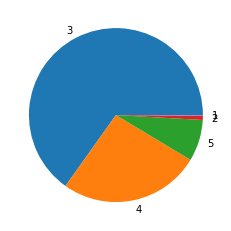

In [25]:
#obtendo informações de frequencia absoluta e relativa das condições do imóveis entre 1 a 5. sendo 1 muito ruim e 5 muito bom
df_percent_condition=df.stb.freq(['condition'])
plt.pie(x=df_percent_condition['percent'],labels=df_percent_condition.condition);


<h1>Analise Exploratória </h1>


*   Observar caracteristicas por caracteristicas das colunas:
1.   Utilizar a analise qualitativa Quantil para eliminar Outliers
*   analisar valores númericos discretos(bedrooms,bathrooms	sqft_living,sqft_lot,floors)



<h3>Grafico de heatmap</h3>
Permite analise de correlação em que:<br>


*   0.7 a 0.9 positivo ou negativo indica uma correlação forte.
*   0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
*   0.3 a 0.5 positivo ou negativo indica uma correlação fraca




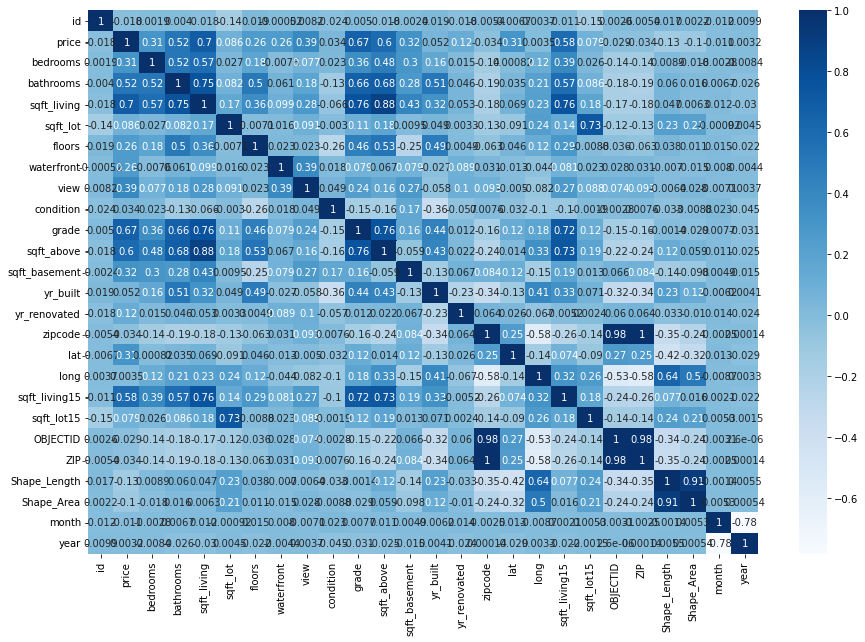

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [27]:
#funções para definição de Analise de outliers
columns=df
def limites(columns):
  q1=columns.quantile(.25)
  q3=columns.quantile(.75)
  amplitude= q3-q1
  return q1-1.5*amplitude, q3+1.5*amplitude
def diagrama_caixa(columns):
  fig,(ax1, ax2)= plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=columns, ax=ax1)
  ax2.set_xlim(limites(columns))
  sns.boxplot(x=columns, ax=ax2)
def histograma(columns):
  plt.figure(figsize=(15,5))
  sns.distplot(columns, hist=True)
def grafico_barra(columns):
  plt.figure(figsize=(15,5))
  ax=sns.barplot(x=columns.value_counts().index,y=columns.value_counts())
  ax.set_xlim(limites(columns))
def grafico_barra2(columns,columns2):
  plt.figure(figsize=(20,25))
  plt.xticks(rotation=75, fontsize=20)
  ax=sns.barplot(x=columns,y=columns2)
def grafico_caixa(column,column2):
  plt.figure(figsize=[12, 6])
  plt.subplot(122)
  plt.xticks(rotation=75, fontsize=10)
  sns.boxplot(x=column, y=column2, data=df)
  plt.show()

<h1>Price</h1>

In [ ]:
df.sort_values('price',ascending=False).head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,PREFERRED_CITY,Shape_Length,Shape_Area,month,year
7840,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,...,3480,1910,1987,47.6298,-122.323,SEATTLE,37488.780791,4.322189e+07,10,2014
4219,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,...,2360,1940,2001,47.6500,-122.214,BELLEVUE,108801.063326,2.014512e+08,6,2014
10014,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,1030,2001,0,47.6305,-122.240,MEDINA,37222.726961,3.934682e+07,9,2014
4753,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,3000,2001,0,47.6289,-122.233,MEDINA,37222.726961,3.934682e+07,8,2014
1565,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,...,1280,2009,0,47.6232,-122.220,BELLEVUE,108801.063326,2.014512e+08,4,2015


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


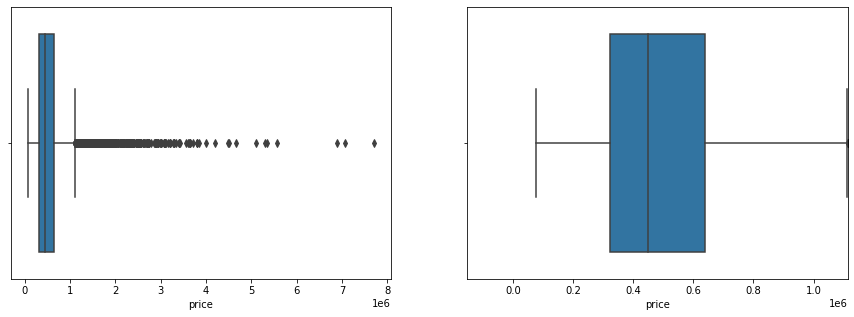

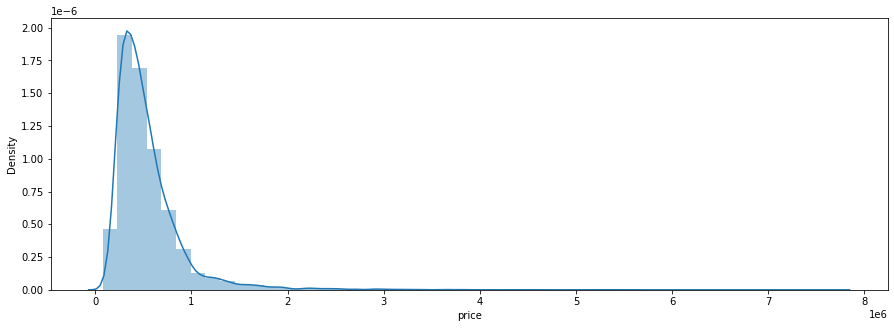

In [ ]:
diagrama_caixa(df['price'])
histograma(df['price'])

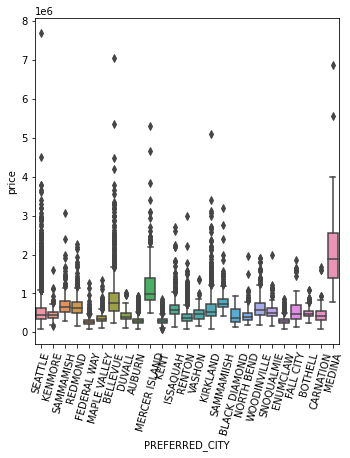

In [28]:
grafico_caixa('PREFERRED_CITY','price')

<h1>Grade</h1>
Classiﬁcação por qualidade de material utilizado na construção

In [29]:
df['grade']

0        7
1        7
2        6
3        7
4        8
        ..
23304    8
23305    8
23306    7
23307    8
23308    7
Name: grade, Length: 23309, dtype: int64

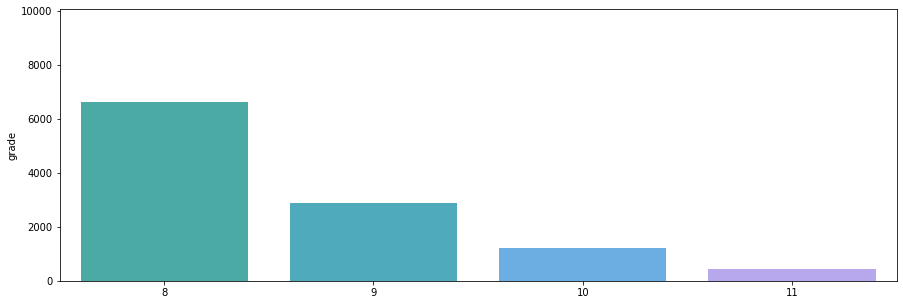

In [30]:
grafico_barra(df['grade'])

<h1>Bedrooms</h1>


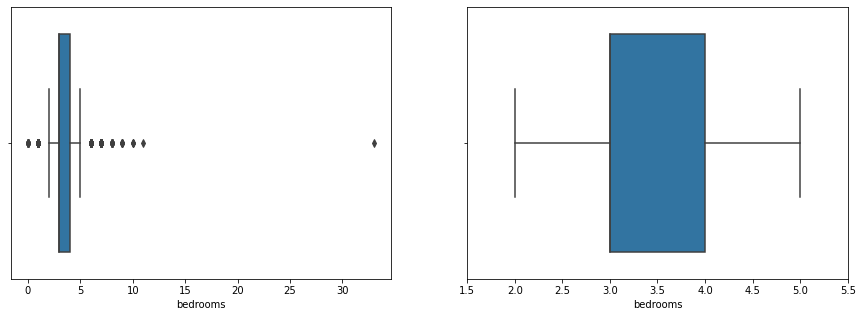

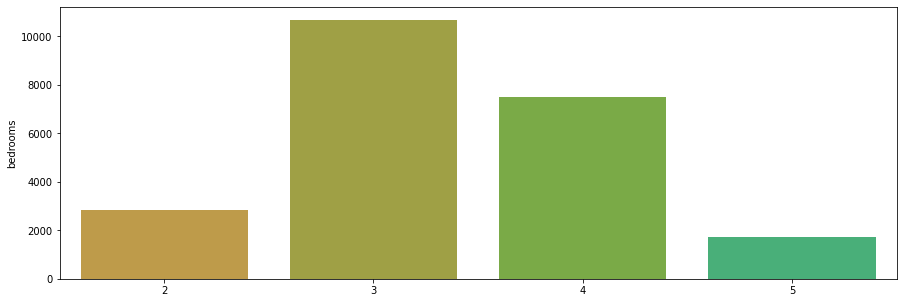

In [ ]:
diagrama_caixa(df['bedrooms'])
grafico_barra(df['bedrooms'])

<h2>Visualização  do mapa</h2>





In [ ]:
amostra= df.sample(n=23309)
centro_mapa={'lat':amostra.lat.mean(),'lon':amostra.long.mean()}

fig =px.density_mapbox(amostra, lat='lat',lon='long',z='price', radius=3,center=centro_mapa, zoom=8, mapbox_style='stamen-terrain')
fig.show()

In [ ]:
#encontrar a cidade do imovel
df['PREFERRED_CITY'].value_counts()


SEATTLE          9232
RENTON           1597
BELLEVUE         1407
AUBURN           1263
KENT             1203
REDMOND           979
KIRKLAND          977
WOODINVILLE       942
FEDERAL WAY       779
ISSAQUAH          733
MAPLE VALLEY      590
ENUMCLAW          468
SAMMAMISH         441
BOTHELL           390
DUVALL            380
SAMMAMIISH        359
SNOQUALMIE        310
KENMORE           283
MERCER ISLAND     282
NORTH BEND        221
CARNATION         124
VASHON            118
BLACK DIAMOND     100
FALL CITY          81
MEDINA             50
Name: PREFERRED_CITY, dtype: int64

<h2>Encoding</h2>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 23308
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           23309 non-null  float64
 1   bedrooms        23309 non-null  int64  
 2   bathrooms       23309 non-null  float64
 3   sqft_living     23309 non-null  int64  
 4   sqft_lot        23309 non-null  int64  
 5   floors          23309 non-null  float64
 6   waterfront      23309 non-null  int64  
 7   view            23309 non-null  int64  
 8   condition       23309 non-null  int64  
 9   grade           23309 non-null  int64  
 10  sqft_above      23309 non-null  int64  
 11  sqft_basement   23309 non-null  int64  
 12  yr_built        23309 non-null  int64  
 13  yr_renovated    23309 non-null  int64  
 14  lat             23309 non-null  float64
 15  long            23309 non-null  float64
 16  PREFERRED_CITY  23309 non-null  object 
 17  Shape_Length    23309 non-null 

In [ ]:
df_cod=df.copy()
coluna_cidades=['PREFERRED_CITY']
df_cod=pd.get_dummies(data=df_cod, columns=coluna_cidades)
display(df_cod.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,PREFERRED_CITY_MERCER ISLAND,PREFERRED_CITY_NORTH BEND,PREFERRED_CITY_REDMOND,PREFERRED_CITY_RENTON,PREFERRED_CITY_SAMMAMIISH,PREFERRED_CITY_SAMMAMISH,PREFERRED_CITY_SEATTLE,PREFERRED_CITY_SNOQUALMIE,PREFERRED_CITY_VASHON,PREFERRED_CITY_WOODINVILLE
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,1,0,0,0,0


<h1>Modelo de previsão</h1>
*   Modelos que foram escolhidos para testar<br>
1.   Random Forest<br>
2.   Linear Regression<br>
3.   Extra Tree<br>








In [ ]:
#dados de treino
def avaliar_modelo(nome_modelo,y_teste,previsao):
  r2=r2_score(y_teste, previsao)
  RSME=np.sqrt(mean_squared_error(y_teste, previsao))
  return f'Modelo{nome_modelo}:\nR2:{r2:.2%}\nRSME:{RSME:.2f}'


In [ ]:
modelo_rf=RandomForestRegressor()
modelo_lr=LinearRegression()
modelo_et=ExtraTreesRegressor()

modelos={'RandomForest':modelo_rf,
         'LinearRegression':modelo_lr,
         'ExtraTree':modelo_et,
         }
y=df_cod['price']
x=df_cod.drop('price',axis=1)

<h3>Separação dos dados eem treino e teste + Treino do modelo</h3>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=10)

for nome_modelo, modelo in modelos.items():
  #treinar
  modelo.fit(x_train,y_train)
  #test
  previsao= modelo.predict(x_test)
  print(avaliar_modelo(nome_modelo,y_test,previsao))

ModeloRandomForest:
R2:88.45%
RSME:123974.89
ModeloLinearRegression:
R2:75.43%
RSME:180805.18
ModeloExtraTree:
R2:89.92%
RSME:115782.07


<h1>Analise do melhor modelo</h1>

In [ ]:
for nome_modelo, modelo in modelos.items():
  #test
  previsao= modelo.predict(x_test)
  print(avaliar_modelo(nome_modelo,y_test,previsao))

ModeloRandomForest:
R2:88.45%
RSME:123974.89
ModeloLinearRegression:
R2:75.43%
RSME:180805.18
ModeloExtraTree:
R2:89.92%
RSME:115782.07


<h3>Modelo escolhido foi o: ExtraTreesRegressor</h3>


*   Maior valor de R² e ao mesmo tempo menor valor de RSME




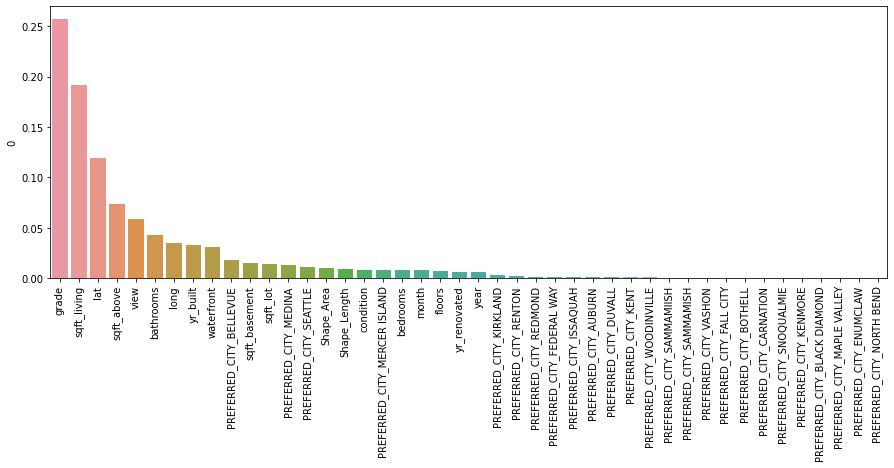

In [ ]:
#Ajustando modelo de ExtraTreesRegressor
#print(modelo_et.feature_importances_)
#print(x_train.columns)
importances_features=pd.DataFrame(modelo_et.feature_importances_,x_train.columns)
importances_features=importances_features.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax=sns.barplot(x=importances_features.index, y=importances_features[0])
ax.tick_params(axis='x',rotation=90)

<h3> Análise final </h3>
Diante das analises graficas e tabelas feitas pode-se concluir, que dados. A liquidez de vendas é importante para investir e manter sustentável os investimentos da imobiliaria. imóveis que são facilmente vendidos por atender requisitos como 

In [ ]:
df.sort_values('price',ascending=False).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,PREFERRED_CITY,Shape_Length,Shape_Area,month,year
7840,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,...,3480,1910,1987,47.6298,-122.323,SEATTLE,37488.780791,4.322189e+07,10,2014
4219,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,...,2360,1940,2001,47.6500,-122.214,BELLEVUE,108801.063326,2.014512e+08,6,2014
10014,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,1030,2001,0,47.6305,-122.240,MEDINA,37222.726961,3.934682e+07,9,2014
4753,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,3000,2001,0,47.6289,-122.233,MEDINA,37222.726961,3.934682e+07,8,2014
1565,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,...,1280,2009,0,47.6232,-122.220,BELLEVUE,108801.063326,2.014512e+08,4,2015
1423,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,...,2390,1991,0,47.5631,-122.210,MERCER ISLAND,75519.659103,1.755842e+08,4,2015
1257,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,...,2020,1999,0,47.6767,-122.211,KIRKLAND,99072.384587,2.568740e+08,10,2014
8747,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,...,4820,1983,2009,47.5570,-122.210,MERCER ISLAND,75519.659103,1.755842e+08,6,2014
2845,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,...,290,2004,0,47.7493,-122.280,SEATTLE,72017.644679,2.118146e+08,8,2014
9344,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,...,0,2001,0,47.6208,-122.219,BELLEVUE,108801.063326,2.014512e+08,6,2014


In [ ]:
df.sort_values('price',ascending=True).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,PREFERRED_CITY,Shape_Length,Shape_Area,month,year
1239,75000.0,1,0.00,670,43377,1.0,0,0,3,3,...,0,1966,0,47.2638,-121.906,ENUMCLAW,734601.564890,1.136144e+10,2,2015
1240,75000.0,1,0.00,670,43377,1.0,0,0,3,3,...,0,1966,0,47.2638,-121.906,ENUMCLAW,295979.592258,2.507634e+09,2,2015
16535,78000.0,2,1.00,780,16344,1.0,0,0,1,5,...,0,1942,0,47.4739,-122.280,SEATTLE,105513.044308,2.589595e+08,5,2014
500,80000.0,1,0.75,430,5050,1.0,0,0,2,4,...,0,1912,0,47.6499,-121.909,CARNATION,227524.533743,1.160184e+09,5,2014
17506,81000.0,2,1.00,730,9975,1.0,0,0,1,5,...,0,1943,0,47.4808,-122.315,SEATTLE,105513.044308,2.589595e+08,3,2015
8945,82000.0,3,1.00,860,10426,1.0,0,0,3,6,...,0,1954,0,47.4987,-122.341,SEATTLE,63576.402217,1.264362e+08,11,2014
2314,82500.0,2,1.00,520,22334,1.0,0,0,2,5,...,0,1951,0,47.4799,-122.296,SEATTLE,105513.044308,2.589595e+08,5,2014
19958,83000.0,2,1.00,900,8580,1.0,0,0,3,5,...,0,1918,0,47.4727,-122.270,SEATTLE,105513.044308,2.589595e+08,5,2014
4061,84000.0,2,1.00,700,20130,1.0,0,0,3,6,...,0,1949,0,47.4752,-122.271,SEATTLE,105513.044308,2.589595e+08,4,2015
11091,85000.0,2,1.00,830,9000,1.0,0,0,3,6,...,0,1939,0,47.3813,-122.243,KENT,162578.137631,4.804289e+08,9,2014


<h3> Sugestão de imóveis </h3>
Sugestão dos 5 melhores investimentos seriam nas cidades de BELLEVUE(imóveis número index 4219 e 1565), MEDINA(imóveis número index 10014 e 4753)	e SEATTLE(imóvel número index 7840).quanto a não investir de jeito nenhum seriam nesses 5 imóveis de index número 1239 E 1240 na cidade de ENUMCLAW, imóveis de index 16535 E 17506	 na cidade de SEATTLE e imóvel de index 500 na cidade de CARNATION